
# Цель лабораторной работы
Изучить линейные модели, SVM и деревья решений.
# Задание
Требуется выполнить следующие действия:
Выбрать набор данных (датасет) для решения задачи классификации или регресии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите одну из линейных моделей, SVM и дерево решений. Оцените качество модели с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
Повторите пункт 4 для найденных оптимальных значения гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.
# Ход выполнения работы
Подключим все необходимые библиотеки и настроим отображение графиков:

In [9]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [10]:
pd.set_option("display.width", 70)

# Предварительная подготовка данных

In [11]:

data1 = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/2019.csv")

In [12]:

data1.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [13]:
data1.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [14]:
data1.shape

(156, 9)

Значения колонки Country or region уникальны, поэтому ее можно удалить, если заменить на цифровые значения, то значения колонки Overall rank продублируются

In [15]:
data1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [16]:
del data1['Country or region']

Проверка пустых значений

In [17]:
data1.isnull().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Разделение данных
Разделим данные на целевой столбец и признаки:

In [18]:
X = data1.drop("Score", axis=1)
y = data1["Score"]

In [19]:
print(X.head(), "\n")
print(y.head())

Overall rank  GDP per capita  Social support  \
0             1           1.340           1.587   
1             2           1.383           1.573   
2             3           1.488           1.582   
3             4           1.380           1.624   
4             5           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  \
0                    0.986                         0.596   
1                    0.996                         0.592   
2                    1.028                         0.603   
3                    1.026                         0.591   
4                    0.999                         0.557   

   Generosity  Perceptions of corruption  
0       0.153                      0.393  
1       0.252                      0.410  
2       0.271                      0.341  
3       0.354                      0.118  
4       0.322                      0.298   

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: Score, dtype: 

In [20]:
print(X.shape)
print(y.shape)

(156, 7)
(156,)


In [21]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,0.000000,1.779204e-16,-1.195625e-16,-3.188333e-16,-2.391250e-16,2.005162e-16,-3.914248e-18
std,1.003221,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.720983,-2.279334e+00,-4.053282e+00,-3.004986e+00,-2.748526e+00,-1.946801e+00,-1.173697e+00
25%,-0.860492,-7.614944e-01,-5.132402e-01,-7.354299e-01,-5.921083e-01,-8.014454e-01,-6.749404e-01
50%,0.000000,1.381292e-01,2.101925e-01,2.641694e-01,1.710395e-01,-7.736976e-02,-2.663845e-01
75%,0.860492,8.243362e-01,8.171048e-01,6.484713e-01,8.029119e-01,6.677699e-01,3.252258e-01
max,1.720983,1.961299e+00,1.392163e+00,1.722652e+00,1.669330e+00,4.014316e+00,3.633468e+00


Разделим выборку на тренировочную и тестовую:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 7)
(39, 7)
(117,)
(39,)


# Обучение моделей
Напишем функцию, которая считает метрики построенной модели:

In [24]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))


## Линейная модель — Lasso
Попробуем метод Lasso с гиперпараметром $\alpha=1$:

In [25]:
las_1 = Lasso(alpha=1.0)
las_1.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
test_model(las_1)

mean_absolute_error: 0.9688405495765232
median_absolute_error: 0.8483669931794946
r2_score: 0.0634362053469405



## SVM
Попробуем метод NuSVR с гиперпараметром $\nu=0{,}5$:

In [27]:
nusvr_05 = NuSVR(nu=0.5, gamma='scale')
nusvr_05.fit(X_train, y_train)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

Проверим метрики построенной модели:

In [28]:
test_model(nusvr_05)

mean_absolute_error: 0.1675677091407202
median_absolute_error: 0.09515996928587356
r2_score: 0.9486370376927701


SVM показал результаты хуже по коэффициенту детерминации. Медианная абсолютная ошибка меньше, чем у метода Lasso. Средняя абсолютная ошибка лучше.

## Дерево решений
Попробуем дерево решений с неограниченной глубиной дерева:

In [29]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


Проверим метрики построенной модели:

In [30]:
test_model(dt_none)

mean_absolute_error: 0.05987179487179501
median_absolute_error: 0.04499999999999993
r2_score: 0.9949361414955776


Дерево решений показало очень хороший результат по сравнению с рассмотренными раньше методами. Оценим структуру получившегося дерева решений:

In [31]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

In [32]:
stat_tree(dt_none)

Всего узлов: 231
Листовых узлов: 116
Глубина дерева: 9
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 7.275862068965517


# Подбор гиперпараметра $K$
## Линейная модель — Lasso
Введем список настраиваемых параметров:

In [33]:
param_range = np.arange(0.001, 2.01, 0.1)
tuned_parameters = [{'alpha': param_range}]
tuned_parameters

[{'alpha': array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
         6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
         1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
         1.801e+00, 1.901e+00, 2.001e+00])}]

Запустим подбор параметра:

In [34]:
gs = GridSearchCV(Lasso(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

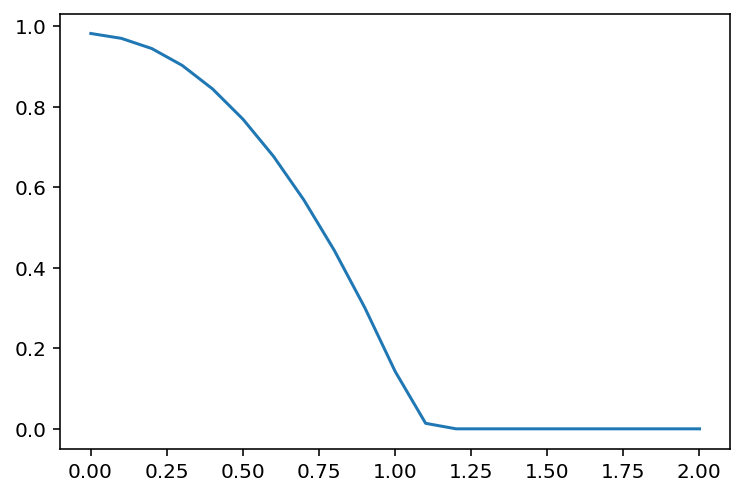

In [35]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

На тестовом наборе данных

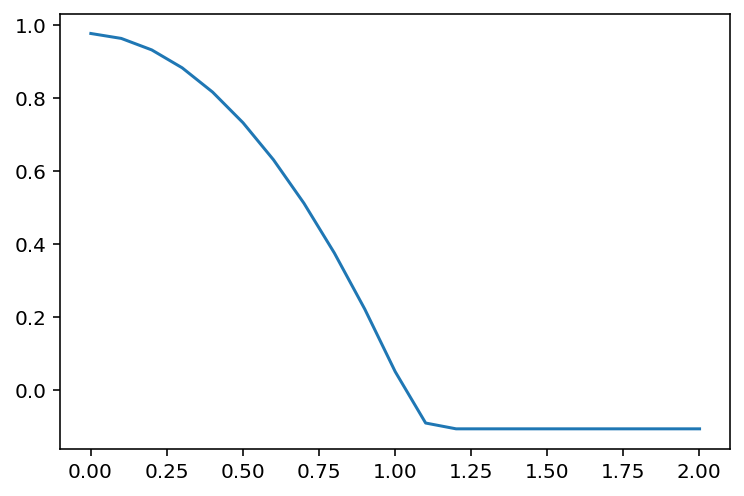

In [36]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Будем считать, что GridSearch показал, что нам нужна обычная линейная регрессия:

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.1313061744755912
median_absolute_error: 0.0981058550923608
r2_score: 0.9774151129843248



В целом получили примерно тот же результат. Очевидно, что проблема в том, что данный метод не может дать хороший результат для данной выборки.

## SVM
Введем список настраиваемых параметров:

In [38]:
param_range = np.arange(0.1, 1.01, 0.1)
tuned_parameters = [{'nu': param_range}]
tuned_parameters

[{'nu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

Запустим подбор параметра:

In [39]:
gs = GridSearchCV(NuSVR(gamma='scale'), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.6, shrinking=True, tol=0.001, verbose=False)


Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

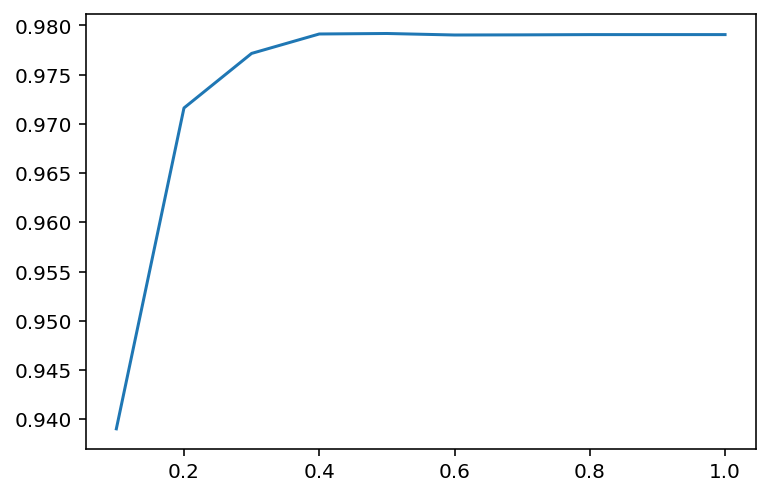

In [40]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

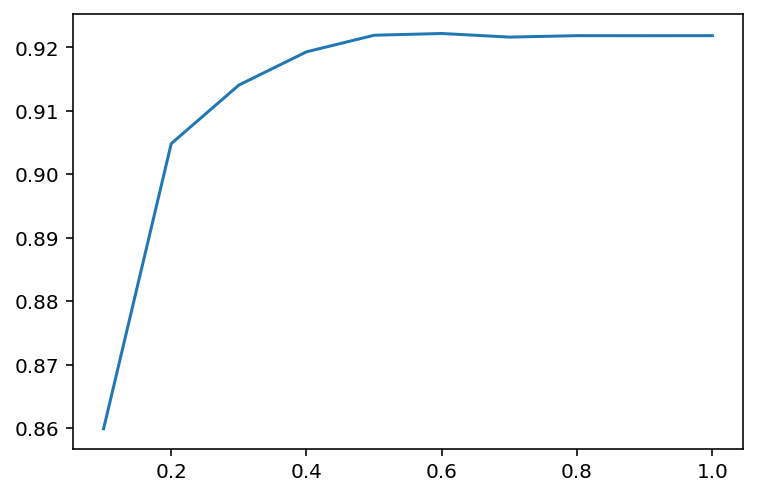

In [41]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);


Так как параметры подобраны те же, то и обучение модели заново производить не будем.

## Дерево решений
Введем список настраиваемых параметров:

In [42]:
param_range = np.arange(1, 51, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [43]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=43, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

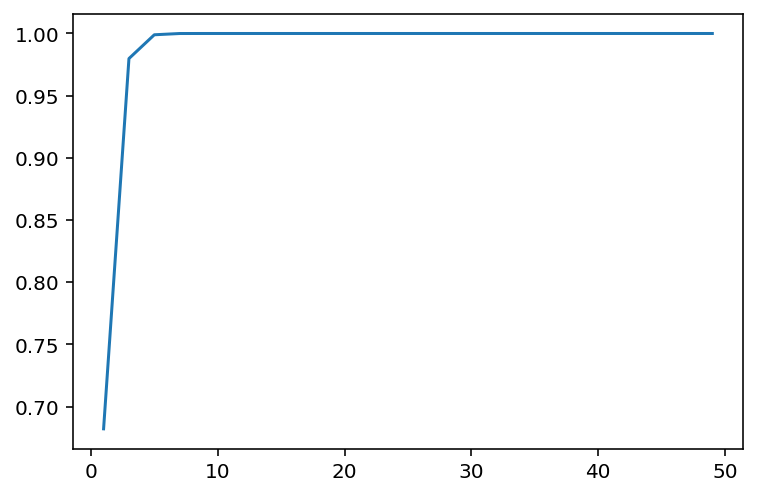

In [44]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

Видно, что на тестовой выборке модель легко переобучается.
На тестовом наборе данных:

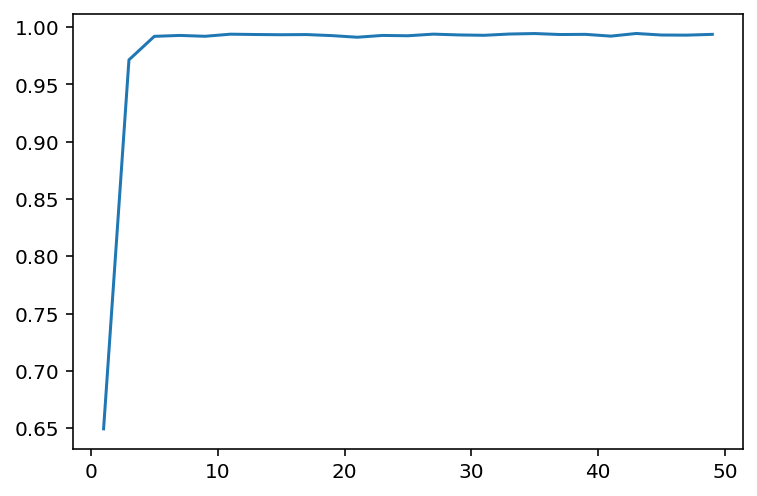

In [45]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Проведем дополнительное исследование в районе пика.

In [90]:
param_range = np.arange(6, 12, 0.5)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
         11.5])}]

In [91]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8.5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

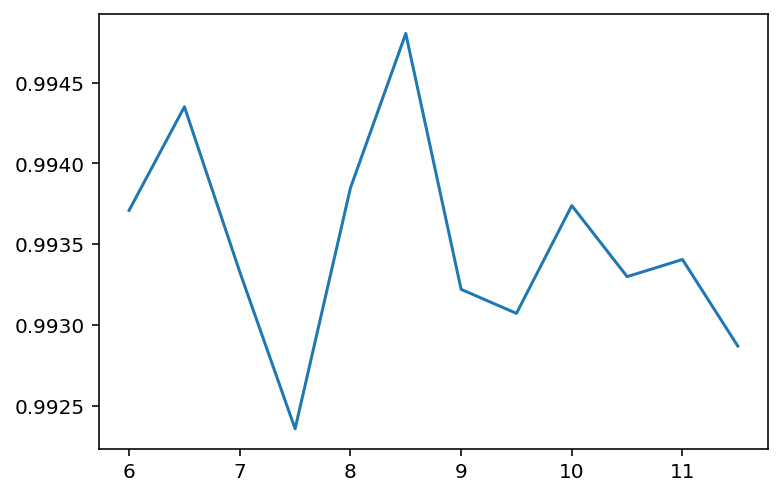

In [92]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);


Получили, что глубину дерева необходимо ограничить 8.5 уровнями. Проверим этот результат.

In [93]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.05697435897435906
median_absolute_error: 0.04100000000000037
r2_score: 0.9949832968073682


Вновь посмотрим статистику получившегося дерева решений.

In [94]:
stat_tree(reg)

Всего узлов: 213
Листовых узлов: 107
Глубина дерева: 8
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 7.046728971962617


В целом получили примерно тот же результат. Коэффициент детерминации оказался немного выше, тогда как абсолютные ошибки также стали немного выше. Видно, что дерево решений достигло своего предела. При этом весьма поразительно, насколько хорошо данный метод решил задачу регрессии. Посмотрим на построенное дерево.

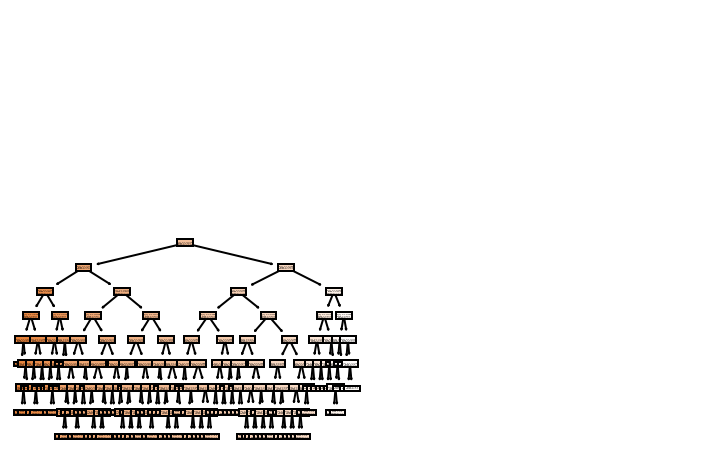

In [95]:
plot_tree(reg, filled=True);


Вывод функции plot_tree выглядит весьма странно. Видимо, для настолько больших деревьев решений она не предназначена. Возможно, это со временем будет исправлено, так как эту функциональность только недавно добавили.

In [53]:
import graphviz

In [54]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

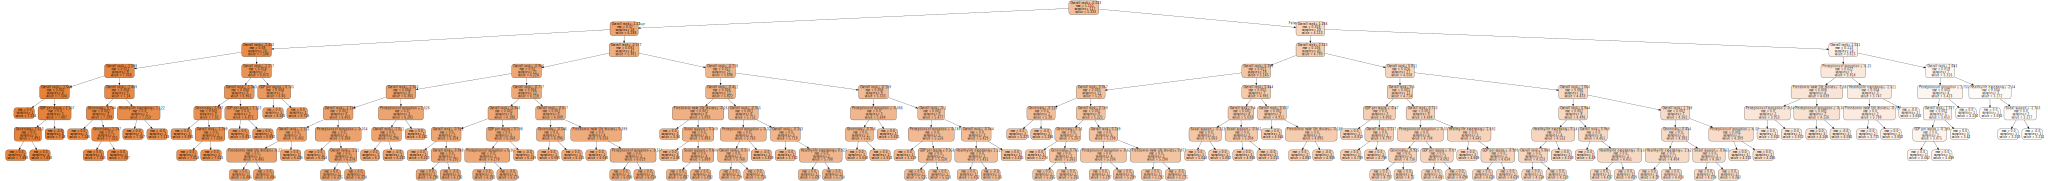

In [97]:
dot_data = export_graphviz(reg, out_file=None, feature_names=columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

Такое дерево уже можно анализировать. Видно, что сгенерировалось огромное множество различных условий, и, фактически, модель переобучена, но с другой стороны дерево решений и не могло быть построено иначе для задачи регрессии. К тому же на тестовой выборке данное дерево работает также довольно хорошо, так что, возможно, оно имеет право на существование. Если бы стояла задача классификации, то дерево решений явно показало бы себя просто отлично.